In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Indroduction

This project aims at predicting diamond price based on its features using regression models

Diamonds data set available on kaggle (https://www.kaggle.com/enashed/diamond-prices)

# Project Planning
1. Data exploration
2. Feature engineering
3. Data preprocessing for model
4. Basic model building
5. Model Tuning
6. Ensemble model building
7. Results

# Data Exploration

In [59]:
data = pd.read_csv("./diamonds_project/diamonds.csv")

In [82]:
X = data[data.columns.difference(['total_sales_price'])]
y = data["total_sales_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [83]:
X_train.head()

,clarity,color,culet_condition,culet_size,cut,date,depth_percent,diamond_id,eye_clean,fancy_color_dominant_color,...,girdle_min,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent
117682,VVS1,I,Pointed,NaN,Excellent,2022-02-24,62.3,132710978,Yes,NaN,...,NaN,IGI,3.29,5.26,5.29,Excellent,Round,0.57,Excellent,59.5
65822,VS2,E,NaN,N,Excellent,2022-02-24,62.6,133141494,NaN,NaN,...,M,GIA,2.77,4.41,4.43,Excellent,Round,0.33,Excellent,56.0
55367,VS2,I,NaN,N,Excellent,2022-02-24,62.2,128589677,Yes,NaN,...,M,GIA,2.74,4.41,4.42,Excellent,Round,0.33,Excellent,57.0
149387,SI1,H,NaN,NaN,NaN,2022-02-24,63.5,135372276,NaN,NaN,...,NaN,GIA,3.22,7.22,5.08,Excellent,Pear,0.70,Excellent,58.0
178136,VVS2,E,NaN,N,NaN,2022-02-24,61.7,135763958,NaN,NaN,...,XTK,GIA,61.70,5.80,5.66,Very Good,Emerald,1.01,Very Good,75.0


In [87]:
y_train.head()

117682    2308
65822     1034
55367      966
149387    3708
178136    7514
Name: total_sales_price, dtype: int64

In [67]:
X_train.dtypes

clarity                         object
color                           object
culet_condition                 object
culet_size                      object
cut                             object
date                            object
depth_percent                  float64
diamond_id                       int64
eye_clean                       object
fancy_color_dominant_color      object
fancy_color_intensity           object
fancy_color_overtone            object
fancy_color_secondary_color     object
fluor_color                     object
fluor_intensity                 object
girdle_max                      object
girdle_min                      object
lab                             object
meas_depth                     float64
meas_length                    float64
meas_width                     float64
polish                          object
shape                           object
size                           float64
symmetry                        object
table_percent            

In [68]:
X_train.shape

(164778, 26)

In [69]:
X_train.columns

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 187970 to 67361
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   clarity                      164778 non-null  object 
 1   color                        157864 non-null  object 
 2   culet_condition              11523 non-null   object 
 3   culet_size                   100402 non-null  object 
 4   cut                          119304 non-null  object 
 5   date                         164778 non-null  object 
 6   depth_percent                164778 non-null  float64
 7   diamond_id                   164778 non-null  int64  
 8   eye_clean                    46881 non-null   object 
 9   fancy_color_dominant_color   6916 non-null    object 
 10  fancy_color_intensity        6914 non-null    object 
 11  fancy_color_overtone         1566 non-null    object 
 12  fancy_color_secondary_color  803 non-null     object 


In [71]:
X_train.isnull().sum() / df.shape[0] * 100

clarity                         0.000000
color                           3.146961
culet_condition                69.755216
culet_size                     29.301242
cut                            20.697848
date                            0.000000
depth_percent                   0.000000
diamond_id                      0.000000
eye_clean                      53.661745
fancy_color_dominant_color     71.852128
fancy_color_intensity          71.853039
fancy_color_overtone           74.287223
fancy_color_secondary_color    74.634508
fluor_color                    69.611386
fluor_intensity                 0.043695
girdle_max                     28.802844
girdle_min                     28.505626
lab                             0.000000
meas_depth                      0.000000
meas_length                     0.000000
meas_width                      0.000000
polish                          0.000000
shape                           0.000000
size                            0.000000
symmetry        

In [9]:
nb_columns = ['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

In [10]:
cat_columns = ['shape', 'color', 'clarity', 'symmetry', 'polish',  'fluor_intensity', 'lab']

In [72]:
X_train.describe()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent
count,164778.000000,1.647780e+05,164778.000000,164778.00000,164778.000000,164778.000000,164778.000000
mean,61.681214,1.281192e+08,3.287956,5.55081,5.136907,0.756476,57.750128
std,9.900247,1.317165e+07,2.085593,1.77212,1.384270,0.851837,9.941382
min,0.000000,9.666855e+06,0.000000,0.00000,0.000000,0.080000,0.000000
25%,61.200000,1.275639e+08,2.680000,4.35000,4.310000,0.310000,57.000000
50%,62.400000,1.325993e+08,3.030000,5.06000,4.800000,0.500000,58.000000
75%,63.500000,1.348522e+08,3.640000,6.35000,5.700000,1.000000,60.000000
max,98.700000,1.361475e+08,76.300000,93.66000,62.300000,19.350000,94.000000


In [73]:
X_train.color.unique()

array(['H', 'D', 'E', 'G', 'J', 'I', 'F', 'K', nan, 'M', 'L'],
      dtype=object)

In [74]:
X_train['shape'].unique()

array(['Round', 'Heart', 'Asscher', 'Pear', 'Oval', 'Princess', 'Emerald',
       'Marquise', 'Radiant', 'Cushion Modified', 'Cushion'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


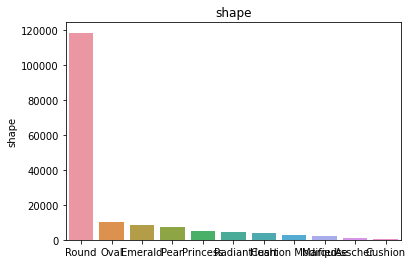

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


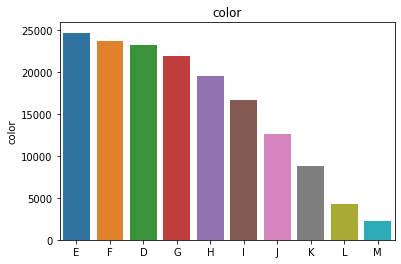

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


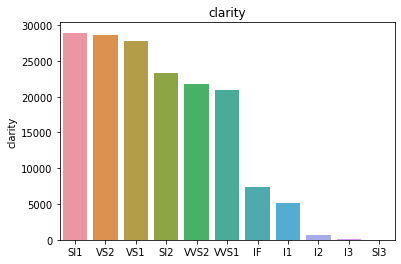

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


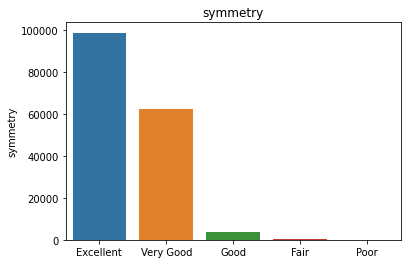

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


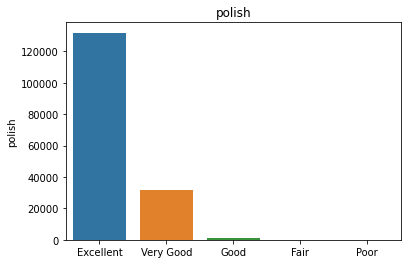

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


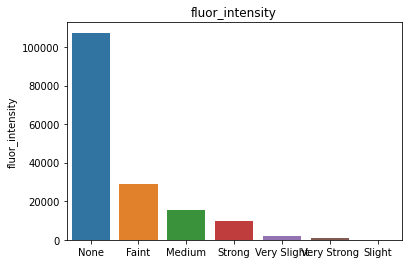

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


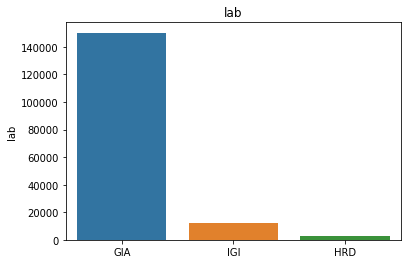

In [75]:
for name in cat_columns:
    sbn.barplot(X_train[name].value_counts().index, X_train[name].value_counts()).set_title(name)
    plt.show()

In [90]:
full_training_set = X_train
full_training_set["total_sales_price"] = y_train

full_training_set.groupby(["clarity"])['total_sales_price'].mean()

clarity
I1       5662.488201
I2       4392.220196
I3       4150.893333
IF      10307.349393
SI1      6581.455466
SI2      6636.058618
SI3       408.250000
VS1      7647.057354
VS2      7583.165834
VVS1     5558.177681
VVS2     6131.477914
Name: total_sales_price, dtype: float64

In [91]:
full_training_set.groupby(["color"])['total_sales_price'].mean()

color
D    6366.127592
E    5356.790948
F    5513.506534
G    7147.485225
H    7449.196845
I    6873.682521
J    6650.038291
K    6185.900181
L    5882.904176
M    6042.950579
Name: total_sales_price, dtype: float64

*color values are coded E been nearly colorless to M been Light Yellow color*

Refer to the link for more info https://australiandiamondimporters.com.au/colour/

In [81]:
X_train['date'].unique()

array(['2022-02-24'], dtype=object)

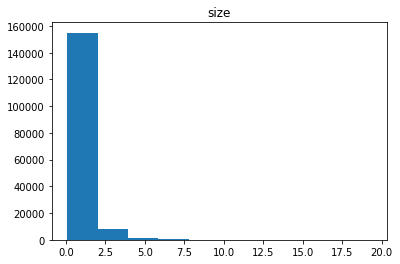

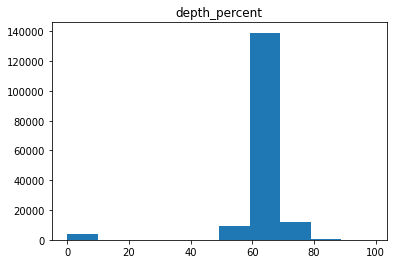

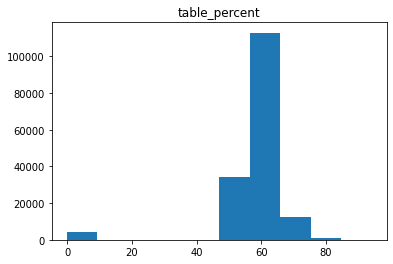

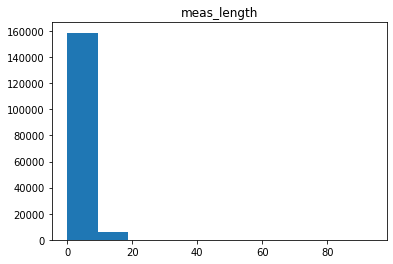

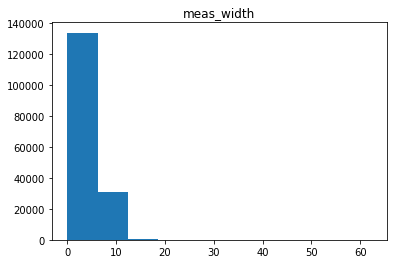

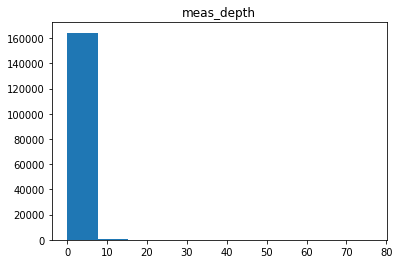

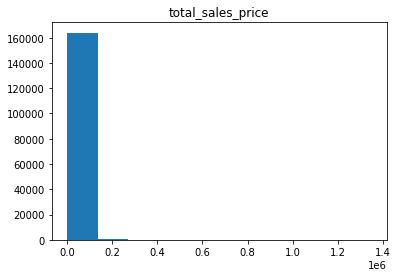

In [92]:
for name in nb_columns:
    plt.hist(X_train[name])
    plt.title(name)
    plt.show()

                       size  depth_percent  table_percent  meas_length  \
size               1.000000       0.063203       0.091485     0.778160   
depth_percent      0.063203       1.000000       0.673950     0.133485   
table_percent      0.091485       0.673950       1.000000     0.168738   
meas_length        0.778160       0.133485       0.168738     1.000000   
meas_width         0.785592       0.125197       0.144362     0.785484   
meas_depth         0.353089       0.090090       0.084414     0.344004   
total_sales_price  0.748826       0.025845       0.045231     0.490235   

                   meas_width  meas_depth  total_sales_price  
size                 0.785592    0.353089           0.748826  
depth_percent        0.125197    0.090090           0.025845  
table_percent        0.144362    0.084414           0.045231  
meas_length          0.785484    0.344004           0.490235  
meas_width           1.000000    0.414444           0.509121  
meas_depth           0.414444

<AxesSubplot:>

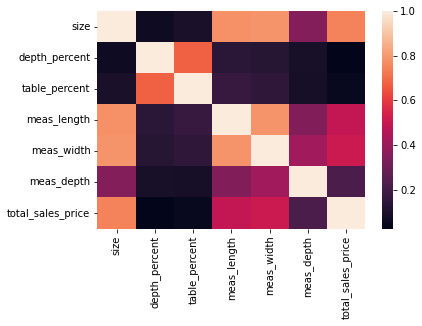

In [93]:
corr = X_train[nb_columns].corr()
print(corr)
sbn.heatmap(corr)

In [94]:
pd.pivot_table(full_training_set, index="color", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
color,,,,,,
D,61.184904,3.102623,5.290951,0.603043,57.711819,6366.127592
E,61.534135,3.044432,5.124311,0.576440,57.730980,5356.790948
F,61.862325,3.122224,5.236819,0.617202,57.996225,5513.506534
G,61.756182,3.316275,5.546506,0.739228,57.765055,7147.485225
H,61.696687,3.400865,5.682731,0.805664,57.886239,7449.196845
I,61.567595,3.423947,5.744252,0.835554,57.760482,6873.682521
J,61.860055,3.504795,5.923753,0.911978,57.896157,6650.038291
K,61.835061,3.478639,5.910495,0.935292,57.576076,6185.900181
L,61.774988,3.582441,6.055573,1.016418,57.555246,5882.904176


In [95]:
pd.pivot_table(full_training_set, index="cut", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
cut,,,,,,
Excellent,60.684385,3.204627,5.096307,0.624926,56.455634,5421.860274
Fair,63.320000,3.728000,5.866000,0.878000,61.100000,2848.600000
Good,62.700000,3.983810,7.755714,1.494286,59.261905,10053.380952
Ideal,69.800000,3.330000,6.250000,0.900000,64.000000,3767.000000
None,67.400000,3.020000,8.580000,0.700000,56.500000,966.000000
Very Good,60.809794,3.261199,5.061946,0.621537,56.183388,4014.006535


## Observations:

### Missing values
- fancy_color columns, culet_condition, fluor_color and eye_clean columns have more than 70% missing values so I will discard them for this analysis
- cut, girdle_min, girdle_max and culet_size has around 30% missing values might be removed
- fluor_intensity, color have really small missing value that need to be handled

### Feature
- Round shape diamond are dominant
- most diamonds tends to be colorless color
- prices from 200 USD -> 1.4M USD (excluding taxes)
- date has only one value feb 2022 can be discarded
- price is mostly correlated to size meas_width, meas_length
- clarity feature seems to impact the price as well

   # Feature enginnering
   

In [96]:
X_train_simplify = X_train.drop(columns = ["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color", "eye_clean", "date", "girdle_min", "girdle_max", "culet_size", "cut"])

In [97]:
X_train_simplify.columns

Index(['clarity', 'color', 'depth_percent', 'diamond_id', 'fluor_intensity',
       'lab', 'meas_depth', 'meas_length', 'meas_width', 'polish', 'shape',
       'size', 'symmetry', 'table_percent', 'total_sales_price'],
      dtype='object')

In [98]:
X_train_simplify["is_expensive"] = X_train_simplify["total_sales_price"].apply(lambda x: 1 if x > df2["total_sales_price"].mean() else 0)

In [99]:
pd.pivot_table(X_train_simplify, index="is_expensive", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth"])

,depth_percent,meas_depth,meas_length,size,table_percent
is_expensive,,,,,
0,61.373419,2.969216,4.972550,0.481288,57.265739
1,62.926067,4.539867,7.834144,1.845802,59.548473


In [100]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train

In [101]:
print(pd.pivot_table(X_full_train_simplify, index="is_expensive", columns="color", values="total_sales_price"))

color                    D             E             F             G  \
is_expensive                                                           
0              1911.583527   1743.399535   1904.284777   2128.337251   
1             28888.199843  26083.919500  24499.067463  25061.193030   

color                    H             I             J             K  \
is_expensive                                                           
0              2251.641367   2149.735276   2098.793207   1931.397288   
1             24927.568820  24066.306128  23500.481399  26177.135779   

color                    L             M  
is_expensive                              
0              2054.129277   2170.454595  
1             24234.263441  22978.172249  


In [102]:
X_train_simplify["is_big"] = X_train_simplify["size"].apply(lambda x: 1 if x > X_train_simplify["size"].mean() else 0)

In [103]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train
X_full_train_simplify.groupby(['is_big']).mean()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent,total_sales_price,is_expensive
is_big,,,,,,,,,
0,61.153538,1.293547e+08,2.845117,4.728896,4.507532,0.404516,56.971585,1708.302315,0.006377
1,62.910244,1.252621e+08,4.296997,7.432159,6.578972,1.563193,59.458028,18814.828159,0.648369


### Data cleaning

In [29]:
X_train_simplify.info()
X_train_simplify.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   diamond_id         219704 non-null  int64  
 1   shape              219704 non-null  object 
 2   size               219704 non-null  float64
 3   color              210542 non-null  object 
 4   clarity            219704 non-null  object 
 5   symmetry           219704 non-null  object 
 6   polish             219704 non-null  object 
 7   depth_percent      219704 non-null  float64
 8   table_percent      219704 non-null  float64
 9   meas_length        219704 non-null  float64
 10  meas_width         219704 non-null  float64
 11  meas_depth         219704 non-null  float64
 12  fluor_intensity    219576 non-null  object 
 13  lab                219704 non-null  object 
 14  total_sales_price  219704 non-null  int64  
 15  is_expensive       219704 non-null  int64  
 16  is

diamond_id              0
shape                   0
size                    0
color                9162
clarity                 0
symmetry                0
polish                  0
depth_percent           0
table_percent           0
meas_length             0
meas_width              0
meas_depth              0
fluor_intensity       128
lab                     0
total_sales_price       0
is_expensive            0
is_big                  0
dtype: int64

In [104]:
X_full_train_simplify.groupby(['color']).count()

X_train_simplify.color = X_train_simplify.color.fillna("E") #fill color with most common one

In [105]:
X_full_train_simplify = X_train_simplify
X_full_train_simplify["total_sales_price"] = y_train

X_full_train_simplify.groupby(['fluor_intensity']).count()
X_train_simplify.fluor_intensity = X_train_simplify.fluor_intensity.fillna("Faint") #fill Faint most common one

### Data preparation

<AxesSubplot:>

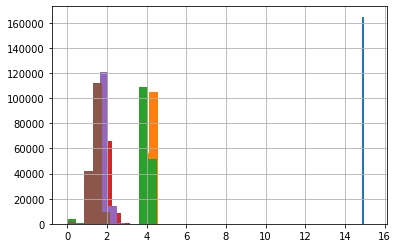

In [106]:
#normalized keeping value in a short range

#normalized log norm of size
X_train_simplify['norm_size'] =np.log(X_train_simplify.size + 1)
X_train_simplify['norm_size'].hist()

#normalized log of depth_percent
X_train_simplify["norm_depth_percent"] = np.log(X_train_simplify.depth_percent + 1)
X_train_simplify["norm_depth_percent"].hist()

#normalized log of meas_depth
X_train_simplify["norm_table_percent"] = np.log(X_train_simplify.table_percent + 1)
X_train_simplify["norm_table_percent"].hist()

#normalized log of meas_length
X_train_simplify["norm_meas_length"] = np.log(X_train_simplify.meas_length + 1)
X_train_simplify["norm_meas_length"].hist()

#normalized log of meas_width
X_train_simplify["norm_meas_width"] = np.log(X_train_simplify.meas_width + 1)
X_train_simplify["norm_meas_width"].hist()

#normalized log of meas_depth
X_train_simplify["norm_meas_depth"] = np.log(X_train_simplify.meas_depth + 1)
X_train_simplify["norm_meas_depth"].hist()


In [108]:
X_train_dummmies = pd.get_dummies(X_train_simplify[['norm_size', 'norm_depth_percent', 'norm_table_percent', 'norm_meas_length', 'norm_meas_width', 'norm_meas_depth', 'total_sales_price', 'shape', 'color', 'clarity', 'symmetry', 'polish', 'fluor_intensity', 'lab', 'is_big', 'is_expensive']])

In [109]:
X_train_dummmies.head(100)

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,total_sales_price,is_big,is_expensive,shape_Asscher,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
117682,14.845568,4.147885,4.102643,1.834180,1.838961,1.456287,2308,0,0,0,...,0,0,0,0,0,1,0,0,0,1
65822,14.845568,4.152613,4.043051,1.688249,1.691939,1.327075,1034,0,0,0,...,0,0,1,0,0,0,0,1,0,0
55367,14.845568,4.146304,4.060443,1.688249,1.690096,1.319086,966,0,0,0,...,0,0,1,0,0,0,0,1,0,0
149387,14.845568,4.166665,4.077537,2.106570,1.805005,1.439835,3708,0,0,0,...,0,0,1,0,0,0,0,1,0,0
178136,14.845568,4.138361,4.330733,1.916923,1.896119,4.138361,7514,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58404,14.845568,4.097672,4.127134,1.690096,1.695616,1.289233,984,0,0,0,...,0,0,1,0,0,0,0,1,0,0
120224,14.845568,4.139955,4.077537,1.805005,1.811562,1.423108,2424,0,0,0,...,0,1,0,0,0,0,0,1,0,0
159991,14.845568,4.149464,4.043051,1.897620,1.902108,1.515127,4581,0,0,0,...,0,0,1,0,0,0,0,1,0,0
93672,14.845568,4.147885,4.060443,1.754404,1.757858,1.381282,1444,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [110]:
#scaling (keeping numeric value in normal distribution)
scale = StandardScaler()

In [111]:
X_train_dummmies_scaled = X_train_dummmies.copy()
X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]] = scale.fit_transform(X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]])
X_train_dummmies_scaled

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,total_sales_price,is_big,is_expensive,shape_Asscher,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
117682,-8.881784e-15,0.131771,0.170317,-0.034678,0.209217,0.145192,2308,0,0,0,...,0,0,0,0,0,1,0,0,0,1
65822,-8.881784e-15,0.139657,0.075590,-0.560969,-0.387284,-0.410513,1034,0,0,0,...,0,0,1,0,0,0,0,1,0,0
55367,-8.881784e-15,0.129135,0.103236,-0.560969,-0.394762,-0.444874,966,0,0,0,...,0,0,1,0,0,0,0,1,0,0
149387,-8.881784e-15,0.163092,0.130409,0.947680,0.071448,0.074438,3708,0,0,0,...,0,0,1,0,0,0,0,1,0,0
178136,-8.881784e-15,0.115887,0.532889,0.263728,0.441121,11.680081,7514,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116180,-8.881784e-15,0.186203,0.103236,0.139635,0.404404,0.445252,2148,0,0,0,...,0,0,1,0,0,0,0,1,0,0
195381,-8.881784e-15,0.080944,0.209248,0.916837,1.290028,1.086790,13015,1,1,0,...,0,0,1,0,0,0,0,0,1,0
92862,-8.881784e-15,0.155317,0.018813,-0.410815,-0.183287,-0.209925,1480,0,0,0,...,0,0,1,0,0,0,0,1,0,0
61255,-8.881784e-15,0.115887,0.130409,-0.655526,-0.485599,-0.561432,994,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [112]:
X_train_dummmies_scaled


117682     2308
65822      1034
55367       966
149387     3708
178136     7514
          ...  
116180     2148
195381    13015
92862      1480
61255       994
193813    11759
Name: total_sales_price, Length: 164778, dtype: int64

# Basic model building